In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df_apple=pd.read_csv("apple_quality.csv")
df_coffee=pd.read_csv("Coffee_Qlty.csv")
df_at=pd.read_csv("nasa.csv")


# preprocessing

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Aroma', 'Flavor', 'Aftertaste', 
                    'Acidity', 'Body', 'Balance', 
                    'Uniformity', 'Clean.Cup', 'Sweetness', 
                    'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects']

categorical_features = ['Species', 'Continent.of.Origin',
                        'Country.of.Origin', 'Variety', 'Color', 'Processing.Method']

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_t', numeric_pipeline, numeric_features),
        ('cat_t', categorical_pipeline, categorical_features)
    ])


In [5]:
dataframe_transformed = preprocessor.fit_transform(df_coffee)

In [6]:
dataframe_transformed.shape

(1339, 91)

In [7]:
dataframe_transformed

<1339x91 sparse matrix of type '<class 'numpy.float64'>'
	with 25441 stored elements in Compressed Sparse Row format>

In [8]:
df_transformed = pd.DataFrame(dataframe_transformed.toarray(), columns=list(numeric_features)
                  +
                  list(
                      preprocessor
                      .named_transformers_['cat_t']['onehot']
                      .get_feature_names_out(input_features=categorical_features)))


In [9]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 91 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Aroma                                        1339 non-null   float64
 1   Flavor                                       1339 non-null   float64
 2   Aftertaste                                   1339 non-null   float64
 3   Acidity                                      1339 non-null   float64
 4   Body                                         1339 non-null   float64
 5   Balance                                      1339 non-null   float64
 6   Uniformity                                   1339 non-null   float64
 7   Clean.Cup                                    1339 non-null   float64
 8   Sweetness                                    1339 non-null   float64
 9   Moisture                                     1339 non-null   float64
 10  

In [10]:
preprocessor.named_transformers_

{'num_t': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler())]),
 'cat_t': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                 ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
 'remainder': 'drop'}

In [11]:
df_transformed.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects', 'Species_Arabica',
       'Species_Robusta', 'Continent.of.Origin_Africa',
       'Continent.of.Origin_Asia', 'Continent.of.Origin_North America',
       'Continent.of.Origin_Oceania', 'Continent.of.Origin_South America',
       'Country.of.Origin_Brazil', 'Country.of.Origin_Burundi',
       'Country.of.Origin_China', 'Country.of.Origin_Colombia',
       'Country.of.Origin_Costa Rica', 'Country.of.Origin_Cote dIvoire',
       'Country.of.Origin_Ecuador', 'Country.of.Origin_El Salvador',
       'Country.of.Origin_Ethiopia', 'Country.of.Origin_Guatemala',
       'Country.of.Origin_Haiti', 'Country.of.Origin_Honduras',
       'Country.of.Origin_India', 'Country.of.Origin_Indonesia',
       'Country.of.Origin_Japan', 'Country.of.Origin_Kenya',
       'Country.of.Origin_Laos', 'Country.of.Origin_Mal

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X = df_transformed[numeric_features]

y = df_transformed['Species_Arabica'].apply(lambda x: 1 if x == 1 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


logr = LogisticRegression()

logr.fit(X_train, y_train)


LogisticRegression()

In [31]:
predictions = logr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9869402985074627


# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X = df_transformed[numeric_features].drop('Balance', axis=1)  

y = df_transformed['Balance']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
for i in X_train, X_test, y_train, y_test:
    print(len(X_train), len(X_test),len(y_train) ,len(X_test))

1071 268 1071 268
1071 268 1071 268
1071 268 1071 268
1071 268 1071 268


In [35]:
lr = LinearRegression()

lr.fit(X_train, y_train)



LinearRegression()

In [36]:

predictions = lr.predict(X_test)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

predictions = lr.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, predictions)
print(f"R-squared Score: {r2}")

Mean Absolute Error (MAE): 0.31835972148584446
Mean Squared Error (MSE): 0.23774459607519224
Root Mean Squared Error (RMSE): 0.4875906029397944
R-squared Score: 0.8787140871018561


In [38]:
print(lr.coef_,lr.intercept_)

[ 0.02327391  0.12057925  0.30332074  0.08684953  0.34685733  0.05973985
  0.02617943  0.01790157 -0.06031566  0.01145763 -0.00160337 -0.0193608 ] -0.010659389085642712


# SVR With Kfold Cross validation

In [39]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import numpy as np

X = df_transformed[ ['Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 
                    'Uniformity','Moisture']]
y = df_transformed['Sweetness']

svr = SVR(kernel='linear')

kfold = KFold(n_splits=10)

scores = []
for train_index, test_index in kfold.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    svr.fit(X_train, y_train)
    
    
    score = svr.score(X_test, y_test)
    scores.append(score)


print(f"Mean Cross Validation Score: {np.mean(scores)}")


Mean Cross Validation Score: -0.08691082597819148


In [40]:
X.shape

(1339, 7)

In [41]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.0001, 0.001, 0.01],
    'gamma': [0.0001, 0.001, 0.01]
}

grid = GridSearchCV(svr, param_grid, cv=5, verbose=2, n_jobs=-1)

grid.fit(X, y)

best_params = grid.best_params_
print(f"Best parameters: {best_params}")

best_score = grid.best_score_
print(f"Best score: {best_score}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'C': 0.1, 'epsilon': 0.01, 'gamma': 0.0001}
Best score: -0.06214236123016885


## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
X = df_transformed[numeric_features]
y = df_transformed[['Country.of.Origin_India']]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 )


In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train ,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt.predict(X_test)

In [46]:
accuracy_score(y_pred , y_test)

0.9888059701492538

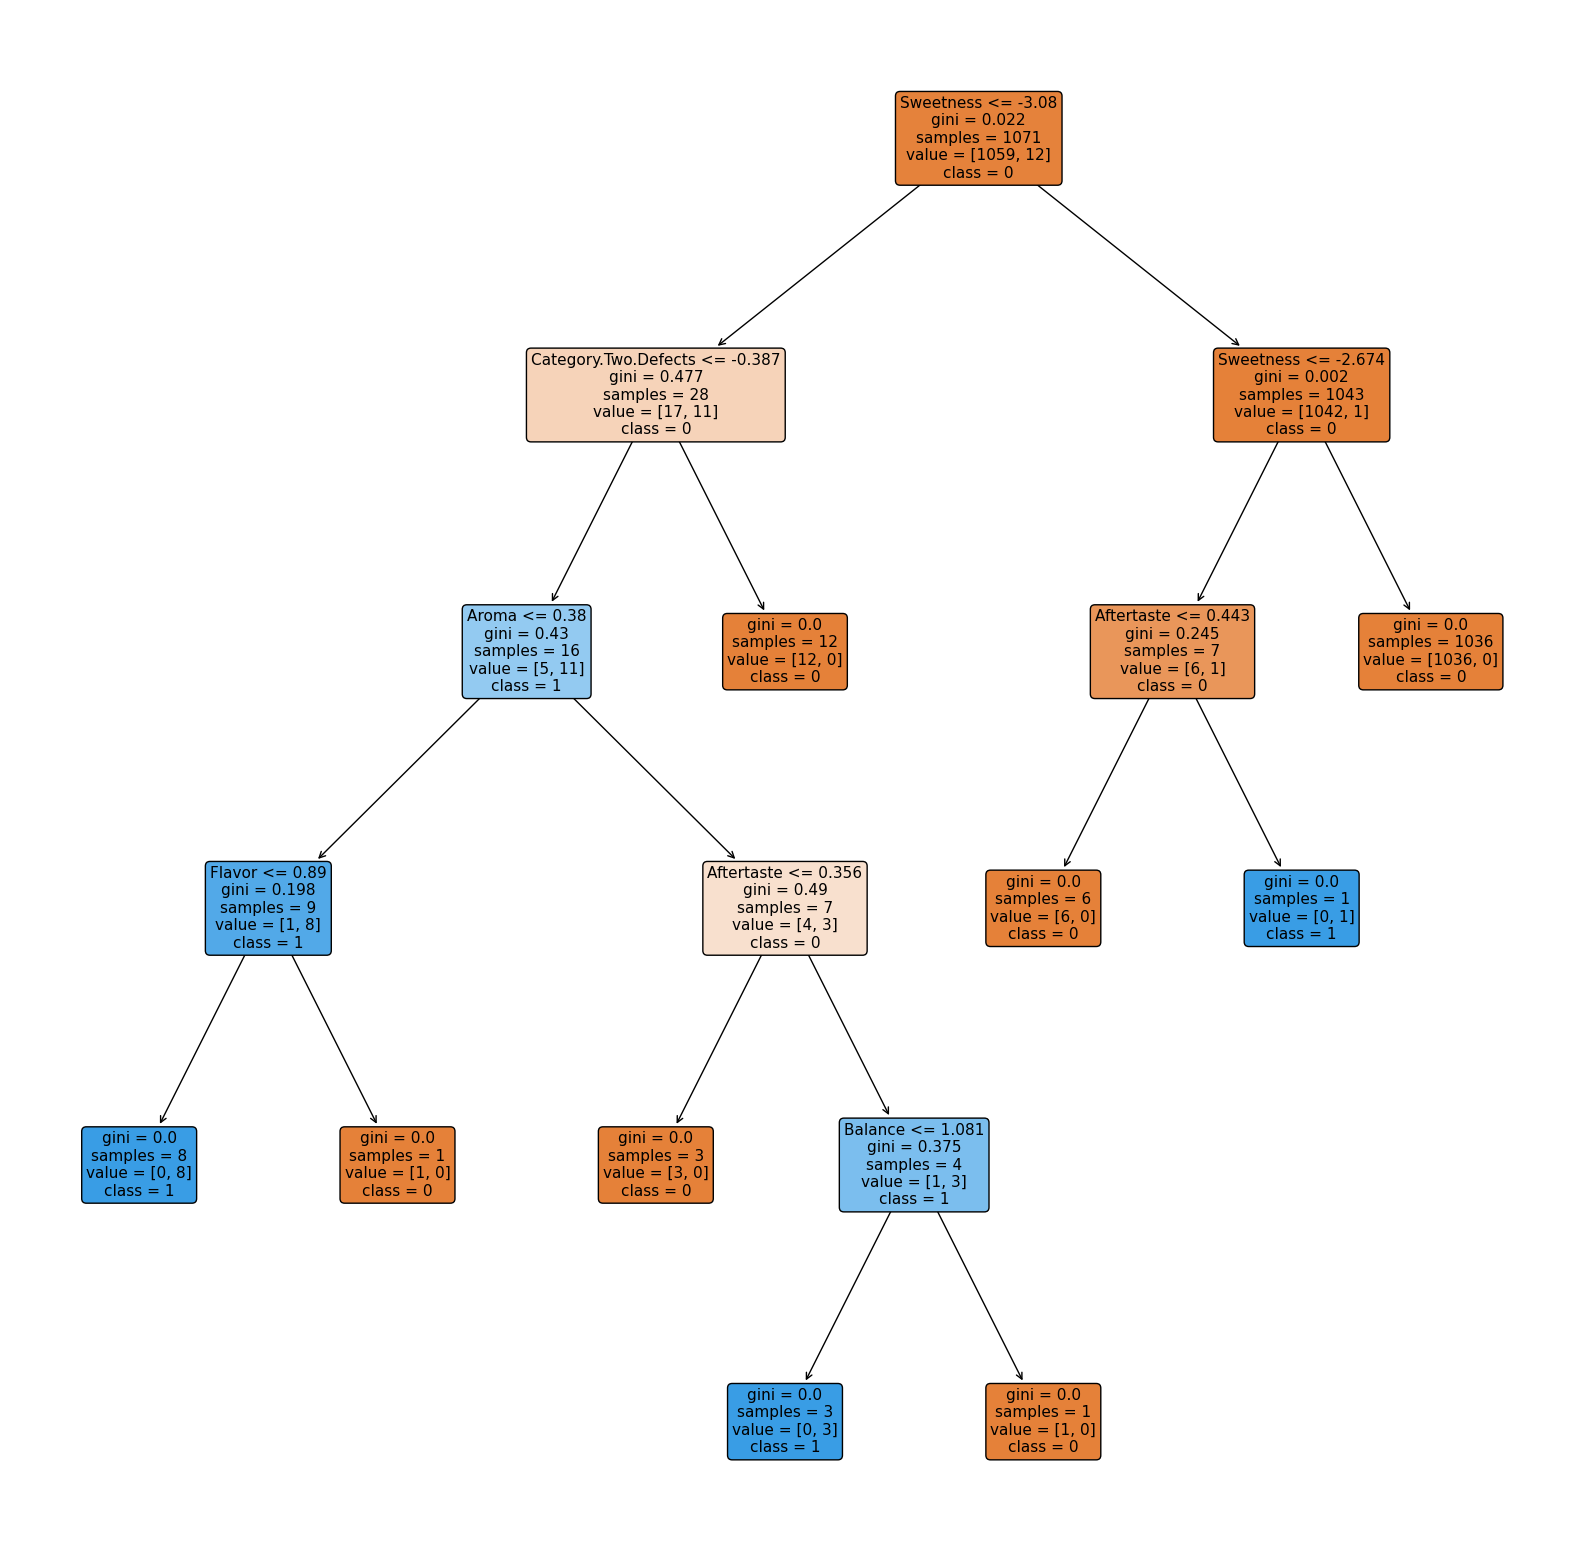

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20)) 

tree.plot_tree(dt, feature_names=numeric_features, 
               class_names=['0','1'],
               filled=True, 
               rounded=True,ax=ax)
plt.show()


# Random Forest

In [48]:
df_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [49]:
numeric_columns = df_at._get_numeric_data()


In [50]:
numeric_columns

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler()



In [52]:
X = df_at[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 
           'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 
           'Eccentricity', 'Semi Major Axis', 'Inclination', 'Perihelion Distance']]


y = df_at['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

rfclf = RandomForestClassifier(n_estimators=100, random_state=42)

rfclf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfclf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(rfclf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42)

random_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


X = df_transformed[['Aroma','Flavor']]
y = df_transformed['Color_Green']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# PCA

In [ ]:
df_apple

In [ ]:
df_apple = df_apple[:-1]
df_apple

In [ ]:
df_apple.head()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_apple.drop('Quality', axis=1)
y = df_apple['Quality']

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)



In [ ]:
print("Principal components:")
print(X_pca)


In [ ]:
y_reshaped = np.reshape(y, (4000, 1))
temp = np.concatenate([X_pca, y_reshaped], axis=1)
reduced_df = pd.DataFrame(temp, columns=['PC1', 'PC2', 'Quality'])
reduced_df

In [ ]:
X = reduced_df[['PC1','PC2']]

y = reduced_df['Quality'].map({'good': 1, 'bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [ ]:
accuracy_score(y_pred ,y_test)

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (n=2)")
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Quality'].map({'good': 1, 'bad': 0}))
plt.legend([0, 1])
plt.show()